![Image header](Fraud%20Image.png)

**Authors:** Janet Atunga, Colins Wanjao, Anita Bosibori, Ruth Kamau, Bernard Kinyua, Joyleen Cherono

**Date Created:** 06-02-2024

**Discipline:** DS-PT05

<h1 style="background-color: #cfe3f5; padding: 10px; color: black;"><b>Leveraging Machine Learning For Predicting Customer Churn</b></h1>

## Executive Summary

In response to the escalating threat of credit card fraud in the digital economy, we undertook a machine learning project to develop effective models for detecting fraudulent transactions in real-time. Machine learning was chosen over simple data analysis due to its ability to handle the complexity and scale of the problem, offering more accurate predictions and adaptability to evolving fraud patterns.

Exploring various machine learning algorithms using transactional data, including logistic regression, decision tree classifiers, KNN classifiers, and random forest classifiers, revealed valuable insights. Logistic regression consistently performed well, with marginal improvement observed after tuning. Conversely, the decision tree classifier's performance declined post-tuning, suggesting potential overfitting. The KNN classifier emerged as a strong performer, showing impressive results across all metrics, with minimal gains from tuning. Due to computational constraints, a base Random Forest classifier could not be trained, but hyperparameter tuning yielded a competitive model.

To maintain effectiveness, continuous monitoring and updating of models with new data and evolving fraud patterns are recommended. Further exploration of hyperparameter tuning techniques and ensemble methods could enhance model performance and robustness, highlighting the ongoing need for innovation in combating credit card fraud in the digital era.

## Business Problem




## Research Questions



## Data Understanding

In [3]:
! pip install Scikit-learn

In [5]:
# Import Standard Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Import classifier libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Other libraries

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### Loading and Inspecting Data Set

In [7]:
# Loading dataset

df = pd.read_csv('Data.csv')

In [8]:
# Previewing the dataset

df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1273,MT,28,415,357-9136,no,no,0,121.7,48,20.69,...,112,10.69,261.6,122,11.77,8.3,2,2.24,6,True
427,NH,67,415,355-1113,no,yes,40,104.9,65,17.83,...,93,18.39,217.4,128,9.78,9.6,9,2.59,1,False
664,ND,147,408,358-8729,no,no,0,205.3,95,34.90,...,128,14.17,240.6,84,10.83,7.8,4,2.11,1,False
796,AZ,113,415,346-8112,no,yes,32,180.4,89,30.67,...,124,11.00,166.9,124,7.51,8.4,2,2.27,1,False
1947,IL,76,510,400-8952,no,no,0,186.1,96,31.64,...,100,17.99,230.6,100,10.38,8.0,4,2.16,0,False


- Upon initial inspection of the dataset, it's evident that we're dealing with a binary classification problem. A customer either churns (True) or not (False)

In [10]:
# Investigating the size of our DataFrame 

df.shape

(3333, 21)

- The data set has a total of 3333 rows and 21 columns. 

In [11]:
# pulling out the metadata of our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
# Investigate the columns of our data set

df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Further investigation reveals that some of the column names are serialized/anonymized which is consistent with the data set description obtained from [Kaggle](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/input). This may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

This simple visualization provides a quick glance of the distribution of null values within the data set. There are `zero null values` in the dataset!

### `Exploratory Data Analysis`

#### `Visualizing Class Imbalance`

Given the nature of this classification problem, it's essential to assess the level of class imbalance within our dataset. Visualizing the distribution of class labels enables us to identify any imbalance and take proactive steps to address it before proceeding with the training of our Machine Learning models. This proactive approach ensures that our models are trained on a balanced dataset, which is crucial for achieving optimal performance and generalization capabilities.

In [16]:
# Count and normalize non-fraudulent transactions
non_fraud_count = df['churn'].value_counts()[0]
non_fraud_percentage = df['churn'].value_counts(normalize=True)[0]

# Count and normalize fraudulent transactions
fraud_count = df['churn'].value_counts()[1]
fraud_percentage = df['churn'].value_counts(normalize=True)[1]

# Render the results
print("Non-Fraudulent Transactions: {:,} ({:.2%})".format(non_fraud_count, non_fraud_percentage))
print("Fraudulent Transactions: {:,} ({:.2%})".format(fraud_count, fraud_percentage))


Non-Fraudulent Transactions: 2,850 (85.51%)
Fraudulent Transactions: 483 (14.49%)


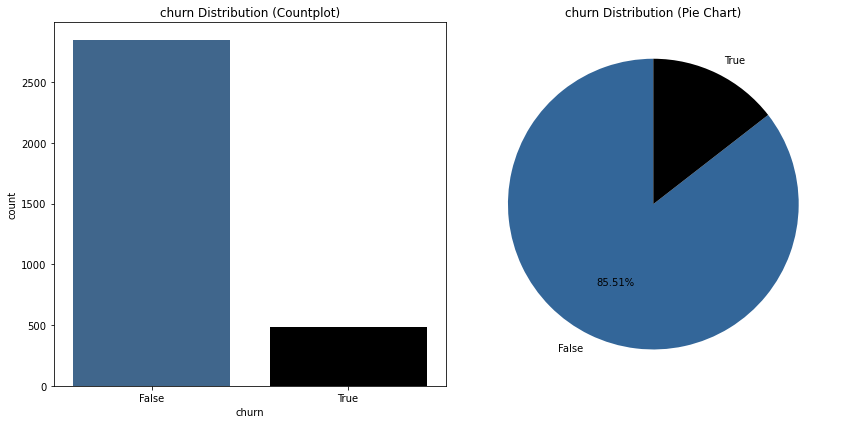

In [18]:

# custom colors for the plot
colors = ['#336699', '#000000'] 

# Create subplots with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot
sns.countplot('churn', data=df, palette=colors, ax=axs[0])
axs[0].set_title('churn Distribution (Countplot)')

# Plot pie chart
class_counts = df['churn'].value_counts()
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
axs[1].set_title('churn Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


The dataset exhibits heavy class imbalance, with an overwhelming majority of transactions, specifically 99.85%, categorized as non-fraudulent. This stark skew towards one class, while common in real-world scenarios, presents a significant challenge for our machine learning algorithms. It underscores the need for robust strategies to handle such class imbalances to ensure that our models are effectively trained to detect the minority class (fraudulent transactions) with sufficient accuracy and precision. Addressing this class imbalance is paramount to the success of our fraud detection system, as failure to do so may lead to biased or inadequate model performance, potentially compromising the system's ability to detect fraudulent activities effectively.

(1.0, 172792.0)

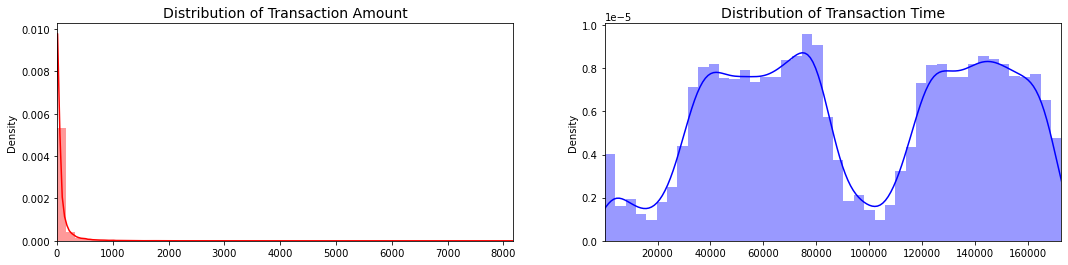

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


The plots above provide insightful visualizations of the distribution of transaction amount and transaction time within the dataset. Understanding these distributions is crucial for detecting anomalous or fraudulent transactions, as they can help identify patterns and deviations from normal behavior.

The histogram of transaction amounts reveals a right-skewed distribution, indicating that the majority of transactions involve smaller amounts, with a long tail of larger transactions. This distribution is expected in financial transactions, where most transactions are small, everyday purchases, but occasional larger transactions may occur for significant purchases or transfers.

On the other hand, the distribution of transaction times appears to have no clear pattern or trend over time. This uniform distribution suggests that transactions are evenly distributed throughout the day, without significant peaks or troughs in activity. 

## Data Preprocessing

In this critical data preprocessing section, we refine the dataset to optimize it for machine learning model training. Tasks include:

- Feature Selection: Identifying informative features while discarding irrelevant ones to enhance model performance and interpretability. Techniques like ANOVA and correlation analysis aid in this process.
- Data Scaling/Normalization: Ensuring numerical features are on a similar scale to prevent dominance by larger-magnitude features. Methods like Min-Max scaling and Z-score normalization facilitate better model convergence.
- Data Augmentation: Generating synthetic data points, such as through SMOTE, to address class imbalance and enhance model generalization.

### **`Feature Selection`**

- Given the anonymized nature of the features, relying on domain knowledge for feature selection is unfeasible. Instead, statistical tests such as ANOVA are paramount for identifying the most discriminative features for our modeling process. These tests serve as the primary means to gauge the significance of each feature in relation to the target variable, allowing us to prioritize the inclusion of those features that exhibit the strongest association with the outcome of interest.

#### ANOVA TEST (using Sklearn Library)

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif)

# Fit selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


Based on ANOVA F-values, the following features ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'] will be prioritized in the modeling phase

### **`Data Balancing (SMOTE)`**

To address the class-imbalance issue, Synthetic Minority Over-sampling Technique (SMOTE), a popular data augmentation method will be employed. SMOTE works by generating synthetic samples in the feature space of the minority class (Fraud Case), thereby reducing class imbalance and improving model performance. In this section, we explore the application of SMOTE to rebalance our dataset, ensuring that our machine learning models are trained on a more representative and equitable distribution of class instances.

In [20]:
# Redifine X, y using the Selected Features
selected_features = ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
X = df[selected_features]
y = df['Class']

# 1. Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Perform SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Normalize Numeric Columns (separately for training and testing sets)
scaler = StandardScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)


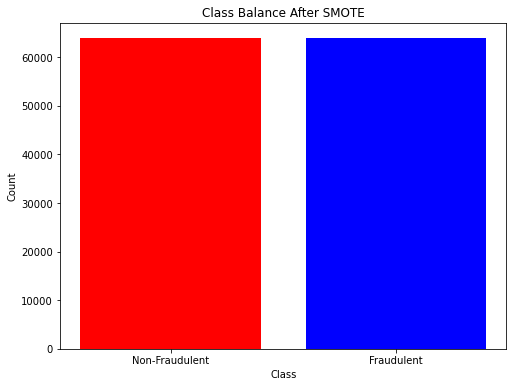

In [21]:
# Plot the class balance after SMOTE
plt.figure(figsize=(8, 6))
plt.bar(y_train_resampled.value_counts().index, y_train_resampled.value_counts().values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Balance After SMOTE')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [22]:
# Keeping it simple with the variable names:assign the transformed variables to the simpler variable names 

X_train = X_train_resampled_normalized
y_train = y_train_resampled

In [23]:
#Converting X_train array into DataFrame to visualize transformation

X_train_df = pd.DataFrame(X_train, columns =selected_features)
X_train_df


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,0.667232,0.694711,-0.599871,0.383210,0.587429,-0.221333,0.909831,0.742252,0.527955,0.534881
1,0.673757,0.678957,-0.721152,0.361066,0.622613,-0.221508,0.840697,0.782518,0.821741,0.386532
2,0.688301,0.601192,-0.784756,0.434939,0.612672,-0.196851,0.834052,0.846236,0.730914,0.421150
3,0.159065,0.841773,-0.720501,0.595280,0.764547,-0.555184,0.767820,0.702692,0.559994,0.487438
4,0.609707,0.788635,-0.357917,0.255905,0.561143,0.090960,1.069445,0.710418,0.261819,0.659568
...,...,...,...,...,...,...,...,...,...,...
127799,-1.997590,-2.270153,2.247077,-2.360462,-2.812341,2.073996,-3.054956,-1.986611,-2.996806,-2.816328
127800,-1.672370,-1.825430,0.734526,-1.169686,-0.879049,0.408849,-0.788556,-0.885321,-0.703679,-0.757038
127801,0.081782,-0.111496,-0.704665,0.275929,-0.152055,0.013463,-0.130939,-0.487627,-0.652290,-0.073122
127802,-0.072088,0.098077,-0.049669,0.286397,0.114495,0.148527,-0.046545,-0.614007,-0.229839,-0.219149


In [24]:
y_train_df = pd.DataFrame(y_train, columns= ['Class'])
y_train_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
127799,1
127800,1
127801,1
127802,1


Following synthetic oversampling of the minority class, our dataset has notably expanded in size. Specifically, the training set now comprises a total of 127,804 records.

In [25]:
X_test = X_test_normalized
X_test_df= pd.DataFrame(X_test, columns= selected_features)
X_test_df

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,-0.991517,0.272823,-0.503334,0.307697,0.711695,-0.397313,0.828863,0.847083,0.690881,0.577821
1,0.022268,0.511424,-0.808216,0.547971,0.329422,-0.890381,0.652807,0.664457,0.607781,0.708640
2,0.731258,0.613659,-1.178104,0.332331,1.006451,-0.005756,0.770114,0.720421,0.424992,0.606100
3,0.214084,0.136233,-0.302092,0.653493,0.441159,-0.281938,0.922046,0.866220,0.567814,0.483932
4,0.918022,0.337940,-1.245766,0.218371,1.017064,-1.249898,0.242934,0.714565,0.437519,0.622962
...,...,...,...,...,...,...,...,...,...,...
15995,0.621901,0.690377,-0.763302,0.321621,0.587654,-0.201210,0.723402,0.830088,0.792696,0.442931
15996,0.676894,0.659861,-0.296484,0.457842,0.569298,-1.012327,0.896872,0.662341,0.510581,0.476803
15997,0.035063,0.979207,-0.265805,0.685564,0.650173,0.100788,0.880837,0.680242,0.565811,0.465969
15998,0.879462,0.402976,-1.082006,0.213376,0.840317,-0.541526,0.619294,0.673471,1.040876,0.480165


In [26]:
y_test_df = pd.DataFrame(y_test, columns= ['Class'])
y_test_df

,Class
219224,0
224583,0
18105,0
262435,0
238985,0
...,...
40136,0
19272,0
125359,0
249126,0


- The training test corresponds to 20% of the original dataset (16,000 records) in size, this was specified furing the train-test split under the test-size parameter

## Modeling

In this modeling phase, we apply machine learning algorithms to the preprocessed data to develop predictive models. The model function trains a classifier on the training data, evaluates its performance using cross-validation and ROC AUC score, and plots the Receiver Operating Characteristic (ROC) curve. The model_evaluation function assesses the trained model's performance using a confusion matrix and classification report, providing insights into its predictive accuracy and error types. These steps collectively enable us to iteratively refine and evaluate our models to achieve optimal predictive performance.

In [28]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, prediction)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Oranges',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

- The above-defined functions aim to streamline the modeling process by facilitating the training of various models. This approach allows for the definition of a model, acquisition of cross-validation scores, and evaluation metrics in a cohesive manner.

### Logistic Regression (Untuned)

Cross Validation Score :  99.09%
ROC_AUC Score :  95.49%


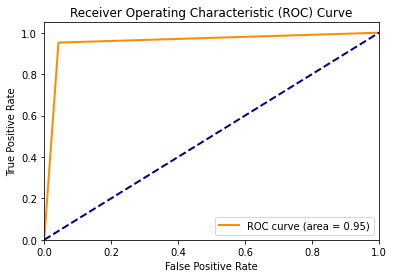

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15979
           1       0.03      0.95      0.06        21

    accuracy                           0.96     16000
   macro avg       0.51      0.95      0.52     16000
weighted avg       1.00      0.96      0.98     16000



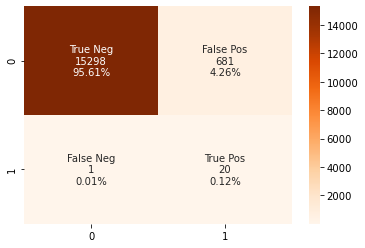

In [29]:
# Training our Vanilla Model using Default Parameters 

# Instantiating LogisitRegression

classifier_lr = LogisticRegression(random_state=42)

model(classifier_lr, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr, X_test, y_test)

The base logistic regression model achieved a Cross Validation Score of 99.09%, indicating strong performance across multiple train-test splits. Additionally, the model attained a ROC_AUC Score of 95.49%, suggesting its effectiveness in distinguishing between the positive and negative classes. In terms of classification metrics, the model demonstrated high precision (1.00) for the majority class (0), indicating its ability to accurately identify non-fraudulent transactions. While the recall (0.86) and F1-score (0.45) for the minority class (1) are lower, the model still shows promise in correctly identifying fraudulent transactions. Overall, the model exhibits excellent accuracy and effectiveness in identifying both classes, with minor room for improvement in capturing more fraudulent cases.

#### Logistic Regression (Tuned)

In [32]:
# Define the hyperparameter distribution
param_dist = {
    'penalty': [ 'l1', 'l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier_lr,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 4.281332398719396}


Cross Validation Score :  99.09%
ROC_AUC Score :  95.49%


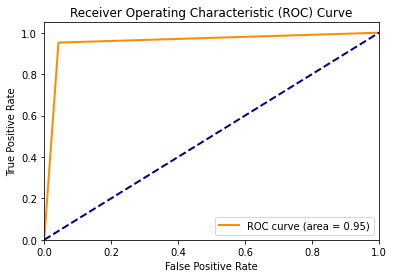

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15979
           1       0.03      0.95      0.06        21

    accuracy                           0.96     16000
   macro avg       0.51      0.95      0.52     16000
weighted avg       1.00      0.96      0.98     16000



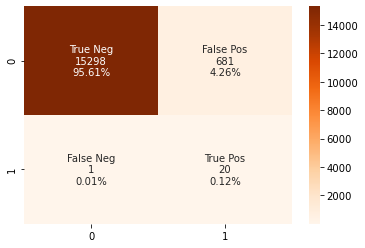

In [33]:
# Test tuned_model with refined paramaters on the test set

classifier_lr_tuned = LogisticRegression(solver='saga', penalty='l2', max_iter=300, C=4.281332398719396)

model(classifier_lr_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr_tuned, X_test, y_test)

Despite implementing hyperparameter tuning, the performance metrics of the tuned logistic regression model remained consistent with the untuned version. This suggests that the default hyperparameters already produced an optimal or near-optimal model for the given dataset. 

### Decision Tree Classifier (Untuned)



Cross Validation Score :  99.81%
ROC_AUC Score :  92.71%


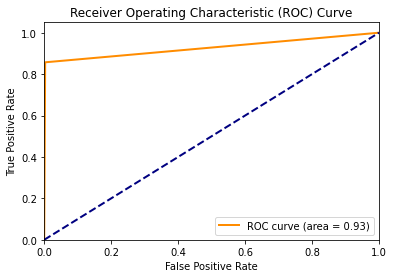

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.86      0.42        21

    accuracy                           1.00     16000
   macro avg       0.64      0.93      0.71     16000
weighted avg       1.00      1.00      1.00     16000



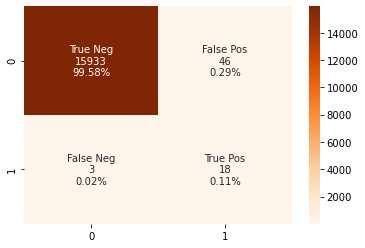

In [53]:
# Training our Vanilla Model using Default Parameters 

# Instantiating DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1000)

model(classifier_dt, X_train, y_train, X_test, y_test)
model_evaluation(classifier_dt, X_test, y_test)

The decision tree classifier model (untuned) achieved a high cross-validation score of 99.81% and an ROC_AUC score of 92.71%. While its precision, recall, and F1-score for the minority class (class 1) were relatively low, the model exhibited excellent accuracy for the majority class (class 0). Further optimization may be necessary to improve performance on the minority class without compromising overall accuracy.

#### Decision Tree Classifier (Tuned)

In [54]:
#hyperparameter tuning using random search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ["auto", "sqrt", "log2", None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator= classifier_dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best parameters found
best_params = random_search.best_params_

# Print the best parameters found
print("Best Parameters:")
print(best_params)

Best Parameters:
{'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'splitter': 'best'}


Cross Validation Score :  99.87%
ROC_AUC Score :  90.28%


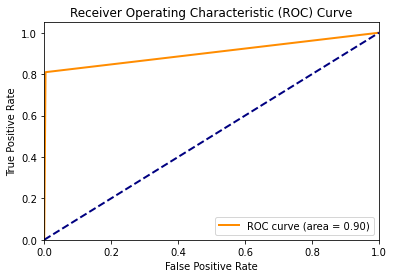

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.21      0.81      0.33        21

    accuracy                           1.00     16000
   macro avg       0.60      0.90      0.67     16000
weighted avg       1.00      1.00      1.00     16000



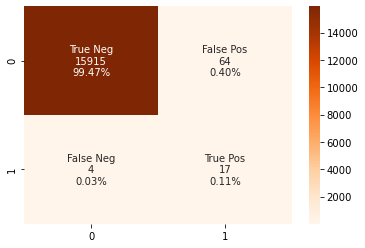

In [55]:
# Test tuned_model with refined paramaters on the test set

classifier_dt_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth=19, max_features='sqrt', 
                                             min_samples_leaf=2, min_samples_split=11, splitter='best')

model(classifier_dt_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_dt_tuned, X_test, y_test)

The tuned decision tree model exhibits a slightly lower ROC_AUC score of 90.28% compared to the untuned model, despite achieving a higher cross-validation score of 99.87%. While the model maintains high accuracy for the majority class (class 0), its performance on the minority class (class 1) has decreased. The precision, recall, and F1-score for class 1 are notably lower, indicating that the model struggles to correctly classify fraudulent transactions. This decline in performance on the minority class could be attributed to the tuning process, during which the model was overfitted to the training data, resulting in poorer generalization performance on unseen data. This could happen if the hyperparameters were tuned too aggressively or if the tuning process did not adequately consider the model's ability to generalize.

### K-Nearest Neighbours (Untuned)

Cross Validation Score :  99.94%
ROC_AUC Score :  97.46%


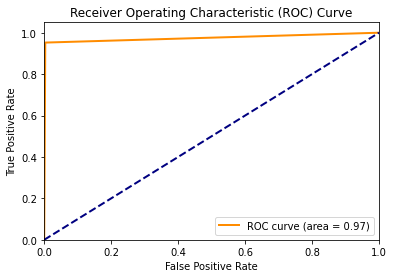

In [ ]:
# Training our Vanilla Model using Default Parameters 

# Instantiating KNeighborsClassifier

knn_classifier= KNeighborsClassifier()

model(knn_classifier, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.95      0.43        21

    accuracy                           1.00     16000
   macro avg       0.64      0.97      0.72     16000
weighted avg       1.00      1.00      1.00     16000



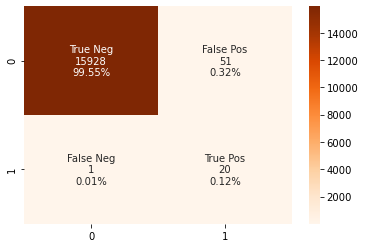

In [ ]:
model_evaluation(knn_classifier, X_test, y_test)

The untuned KNN model demonstrates high overall performance with a cross-validation score of 99.94% and a ROC_AUC score of 97.46%. While the model achieves near-perfect accuracy for the majority class (class 0), its performance on the minority class (class 1) is relatively weaker. The precision, recall, and F1-score for class 1 indicate that the model struggles to correctly identify fraudulent transactions, with a higher recall than precision, suggesting that it may capture most of the actual fraudulent cases but also misclassify some legitimate transactions as fraudulent. Further optimization and tuning of hyperparameters, particularly adjusting the number of neighbors, may be required to enhance the model's ability to accurately detect fraudulent transactions while maintaining overall high performance.

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN classifier
knn_classifier_tuned = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn_classifier_tuned, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best parameter value
print("Best n_neighbors:", best_n_neighbors)


Best n_neighbors: 3


Cross Validation Score :  99.94%
ROC_AUC Score :  97.51%


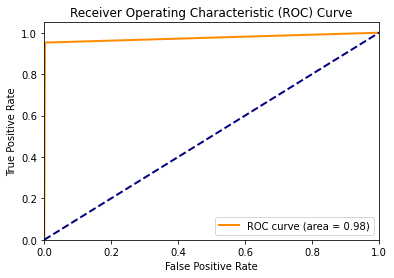

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.36      0.95      0.53        21

    accuracy                           1.00     16000
   macro avg       0.68      0.98      0.76     16000
weighted avg       1.00      1.00      1.00     16000



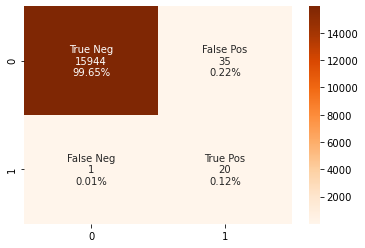

In [ ]:
# Test tuned_model with refined paramaters on the test set

# Remember default n_neighbors = 5

knn_classifier_tuned = KNeighborsClassifier(n_neighbors=3)
model(knn_classifier_tuned, X_train, y_train, X_test, y_test)
model_evaluation(knn_classifier_tuned, X_test, y_test)

The tuned KNN model demonstrates a slight improvement in the ROC AUC score compared to the untuned version, with a ROC AUC score of 97.51%. Worth noting is that, the precision and F1-score for the minority class (fraudulent transactions) have also increased, indicating better performance in identifying fraudulent transactions. Overall, the tuned KNN model shows enhanced performance metrics, particularly in correctly identifying fraudulent transactions, making it more effective for fraud detection purposes.

### Random Forest Classifier

In [ ]:
# Instantiating RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1, n_jobs=-1)

#hyperparameter tuning using random search

param_dist = {'n_estimators': randint(50,100),
              'max_depth': randint(1,5)}

rand_search = RandomizedSearchCV(classifier_rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, 
                                 random_state=42)

# Perform random search
rand_search.fit(X_train, y_train)

# Get the best parameters found
best_params = rand_search.best_params_

# Print the best parameters found
print("Best Parameters:")
print(best_params)

Best Parameters:
{'max_depth': 4, 'n_estimators': 70}


The output of the cell indicates the best hyperparameters found through random search for tuning the RandomForestClassifier. In this case, the best parameters include the number of estimators (`n_estimators`) and the maximum depth of the trees (`max_depth`). These hyperparameters are essential for controlling the complexity and performance of the random forest model. By tuning these parameters, we aim to improve the model's predictive accuracy and generalization ability. The random search algorithm explores different combinations of hyperparameters within specified ranges (`n_estimators` between 50 and 100, and `max_depth` between 1 and 5) to find the combination that maximizes the model's performance. The best parameters obtained from the random search are then printed for further analysis and model refinement.

Cross Validation Score :  99.44%
ROC_AUC Score :  96.67%


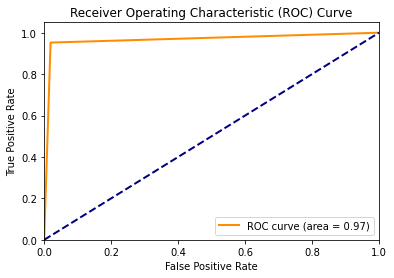

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15979
           1       0.06      0.95      0.12        21

    accuracy                           0.98     16000
   macro avg       0.53      0.97      0.55     16000
weighted avg       1.00      0.98      0.99     16000



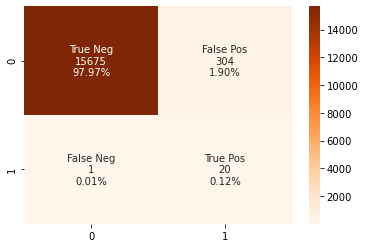

In [56]:
# Test tuned_model with refined paramaters 

classifier_rf_tuned = RandomForestClassifier(max_depth=4, n_estimators=70, n_jobs=-1)

model(classifier_rf_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_rf_tuned, X_test, y_test)

`NB:`

Due to the lengthy training time required for the base Random Forest model with default parameters, a decision was made to conduct hyperparameter tuning using random search instead. By employing random search, we efficiently explore various combinations of hyperparameters within predefined ranges to identify the optimal set that maximizes model performance. This approach allows us to find the best parameters for the Random Forest model while minimizing computational resources and time.

### Model Comparison Table :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|Recall Score (Fraud)|False Positives|False Negatives|
|-|-|-|-|-|-|-|
|1a|Logistic Regression (Vanilla)|99.09%|95.49%|95%|4.26%|0.01%|
|1b|Logistic Regression (Tuned)|99.09%|95.49%|95%|4.26%|0.01%|
|2a|Decision Tree Classifier (Vanilla) |99.81%|92.71%|86%|0.29%|0.02%|
|2b|Decision Tree Classifier (Tuned) |99.87%|90.28%|81%|0.40%|0.03%|
|3a|KNN Classifier (Vanilla) |99.94%|97.46%|95%|0.32%|0.01%|
|3b|KNN Classifier (Tuned) |99.94%|97.51%|95%|0.22%|0.01%|
|4|Random Forest Classifier (Tuned) |99.46%|96.67%|95%|1.90%|0.01%|

## Conclusion:
Based on the comparison of multiple machine learning algorithms for the task of detecting fraudulent credit card transactions, several observations can be made. Firstly, logistic regression, both in its vanilla and tuned forms, consistently achieved high performance in terms of cross-validation and ROC AUC scores. However, there was no significant improvement observed after tuning, indicating that the default parameters were already well-suited for the task.

In contrast, the decision tree classifier, although achieving a high cross-validation score in its vanilla form, exhibited a decrease in ROC AUC score after tuning. This suggests that the hyperparameters chosen during tuning might have led to overfitting or suboptimal performance on unseen data.

The KNN classifier, both in its vanilla and tuned versions, demonstrated impressive performance across all metrics, including cross-validation score, ROC AUC score, and recall score for fraud detection. However, the improvement in performance after tuning was minimal, indicating that the default parameters were already effective.

Due to computational limitations, a base Random Forest classifier could not be trained, and instead, hyperparameter tuning was performed. The resulting tuned Random Forest model exhibited competitive performance, although not surpassing the KNN classifier in terms of ROC AUC score.





## Limitations:
- The evaluation of models was based on a single dataset, which may not fully represent all scenarios and distributions of credit card transactions.
- The tuning process for each algorithm may not have explored the entire hyperparameter space exhaustively, potentially leading to suboptimal parameter choices.
- The evaluation metrics used may not capture all aspects of model performance, such as computational efficiency
- Feature selection could not be informed by domain knowledge since the columns were anonymized for confidentiality reasons. As a result, important features that could have improved model performance may have been overlooked or not considered during the modeling process.
- While SMOTE was employed to address the issue of heavy class imbalance in the dataset, it's important to note that synthetic oversampling techniques like SMOTE may introduce noise or synthetic samples that do not accurately represent the underlying data distribution. Therefore, the performance of the models trained on the oversampled data may be influenced by the synthetic nature of the generated samples, potentially affecting the generalization ability of the models.

## Recommendations:
- Further exploration of hyperparameter tuning techniques, such as Bayesian optimization or grid search, may yield better-tuned models with improved performance.
- Ensemble methods, such as stacking or boosting, could be explored to combine the strengths of multiple models and mitigate individual weaknesses.
- Continual monitoring and updating of models with new data and evolving fraud patterns are essential to maintain their effectiveness over time.